In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# Airbnb Dataset

## SVM Model

In [2]:
from sklearn import svm

In [4]:
model = svm.SVC()

feature_dir = "../data/out/airbnb_features.csv"
target_dir = "../data/out/airbnb_target.csv"
X = pd.read_csv(feature_dir, index_col = 0)
columns = X.columns
X.columns = range(X.shape[1])
y = pd.read_csv(target_dir, index_col = 0)

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 42)
model = model.fit(train_X, train_y)

/Users/apoorv_pochiraju/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
train_X.columns = columns
test_X.columns = columns

In [5]:
pred_test_y = model.predict(test_X)
accuracy_score(pred_test_y, test_y)

0.7440225035161744

In [6]:
pred_y = model.predict(X)
accuracy_score(pred_y, y)

0.7180028129395218

## Global Explanation

### PDP & ICE

In [11]:
from sklearn.inspection import PartialDependenceDisplay

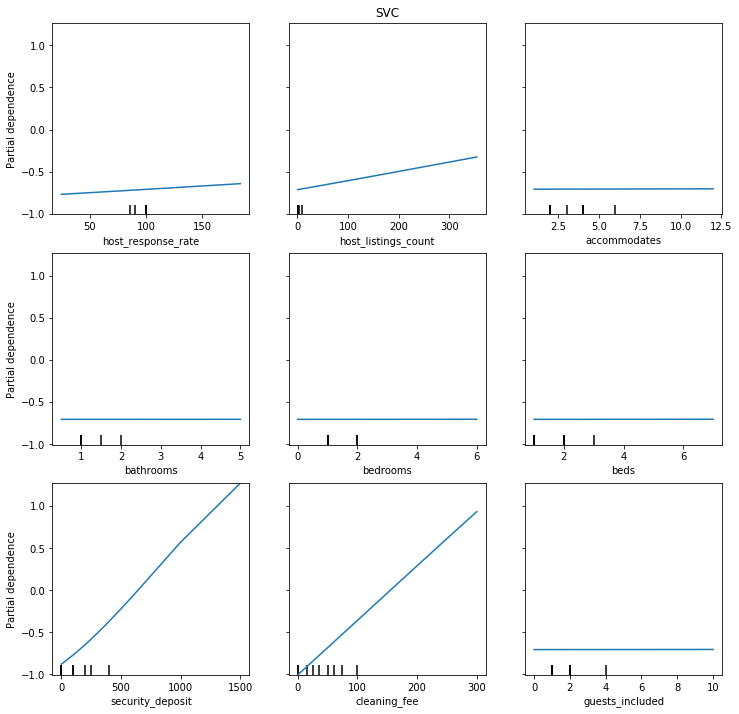

In [12]:
# Partial Dependence Plot that shows dependence between the target function (probability that a given listing has a rating higher than 96) and an input feature of interest
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title("SVC")
pdp_airbnb = PartialDependenceDisplay.from_estimator(model, test_X, [x for x in range(9)], ax = ax)

In [13]:
model.score(test_X, test_y)

0.7440225035161744

## Local Explanation

### SHAP

In [12]:

import shap
import numpy as np

In [14]:
explainer = shap.Explainer(model)
shap_test = explainer(test_X)

In [15]:
print(f"Shap values length: {len(shap_test)}\n")
print(f"Sample shap value:\n{shap_test[0]}")

Shap values length: 711

Sample shap value:
.values =
array([-1.47721840e-03, -4.05976905e-03, -1.90515096e-02,  2.70823238e-02,
       -1.60881851e-01, -2.51052543e-03, -2.67493825e-03, -5.23560021e-02,
       -3.07568051e-03, -2.62211396e-04, -4.62742997e-04, -2.06962288e-04,
       -1.35031541e-03, -6.00029506e-03, -8.24103028e-03, -1.21752647e-02,
        1.77762012e-03,  1.91959931e-03,  6.62297463e-03, -1.73612173e-05,
        3.29872939e-02, -8.11076780e-05,  6.03820817e-04,  1.18722760e-03,
        1.96857993e-03, -6.27510568e-05, -3.21081883e-04,  2.57233474e-06,
        3.70374943e-04, -1.72379130e-05, -1.86212964e-03,  3.99173873e-05,
        0.00000000e+00,  2.38813944e-05,  0.00000000e+00,  3.69134350e-05,
       -1.17887808e-03,  2.93356248e-05, -5.19055473e-04,  0.00000000e+00,
        3.09385143e-04,  1.72299847e-04,  3.67812625e-06,  0.00000000e+00,
       -2.28604784e-04,  0.00000000e+00, -3.00780583e-06, -5.84893371e-04,
        0.00000000e+00, -5.88885875e-05,  4.18

# Loan Dataset

In [7]:
# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../src/')
import LGBM_Explanations as util
import zipfile

In [8]:
loan_dir = "../data/out/feature_engineered_loan_data.csv.zip"
zf = zipfile.ZipFile(loan_dir)
loan = pd.read_csv(zf.open('feature_engineered_loan_data.csv'))

## SVM Model

In [40]:
from sklearn import svm

In [10]:
model = svm.SVC()

X = loan.drop(['Target','Unnamed: 0'], 1)
columns = X.columns
#X.columns = range(X.shape[1])
y = loan[['Target']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 42)
model = model.fit(train_X, train_y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [24]:
train_X.columns = columns
test_X.columns = columns

In [11]:
pred_test_y = model.predict(test_X)
accuracy_score(pred_test_y, test_y)

0.9192

In [12]:
pred_y = model.predict(X)
accuracy_score(pred_y, y)

0.9211

### PDP

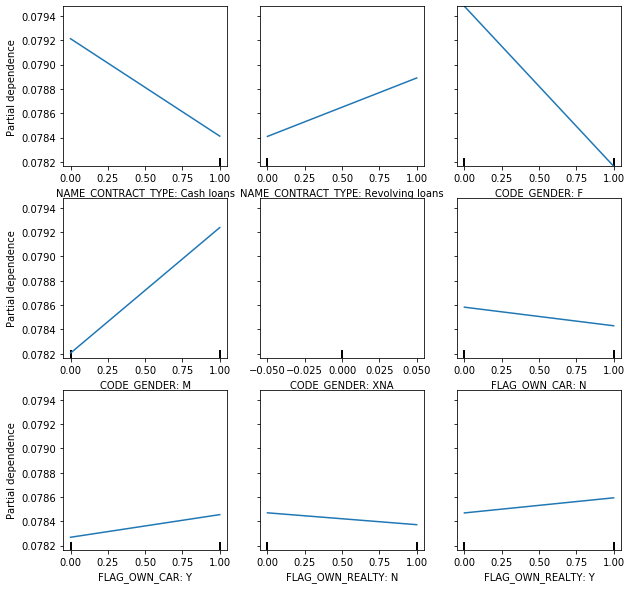

In [25]:
util.PDP(test_X, test_y, model)

### SHAP

In [26]:
import shap
import numpy as np

explainer = shap.Explainer(model)
shap_test = explainer(test_X)
print(f"Shap values length: {len(shap_test)}\n")
print(f"Sample shap value:\n{shap_test[0]}")

Shap values length: 1250

Sample shap value:
.values =
array([-5.95152420e-06,  9.91775842e-06,  7.54485312e-04,  3.36047468e-04,
        0.00000000e+00, -1.33198622e-05, -2.11161651e-04,  5.23228293e-07,
        3.08439969e-05, -5.39893760e-04, -5.75477623e-04,  0.00000000e+00,
       -5.64339835e-05, -5.28326459e-05, -1.53508894e-04, -2.02001438e-04,
        0.00000000e+00,  0.00000000e+00,  6.26418604e-05,  0.00000000e+00,
       -1.52833437e-05,  1.99992451e-05,  0.00000000e+00,  0.00000000e+00,
       -1.23234003e-03,  1.79690321e-06,  1.67847741e-04, -6.38420478e-05,
       -2.75183235e-04,  2.15174915e-04,  9.01911782e-03,  4.41620381e-04,
       -2.68236531e-04, -1.93567200e-04,  0.00000000e+00, -3.14658738e-04,
       -1.80458582e-06, -1.31074578e-04, -2.50658308e-04, -4.14630111e-04,
       -2.72751879e-04, -2.34501855e-04, -1.73444118e-04, -1.17488764e-04,
       -6.10464016e-05, -5.08822291e-04, -4.67570975e-04, -2.66050713e-04,
        1.41741984e-03, -1.63390376e-04, -2.3

# Healthcare Dataset

## SVM Model

In [3]:
model = svm.SVC()

feature_dir = "../data/out/diabetes features.csv"
target_dir = "../data/out/diabetes target.csv"
X = pd.read_csv(feature_dir, index_col = 0)
columns = X.columns
#X.columns = range(X.shape[1])
y = pd.read_csv(target_dir, index_col = 0)

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 42)
model = model.fit(train_X, train_y)

/Users/apoorv_pochiraju/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
train_X.columns = columns
test_X.columns = columns

In [4]:
pred_test_y = model.predict(test_X)
accuracy_score(pred_test_y, test_y)

0.52

In [5]:
pred_y = model.predict(X)
accuracy_score(pred_y, y)

0.5442

## Global Explanations

## PDP and ICE

In [31]:
from sklearn.inspection import PartialDependenceDisplay

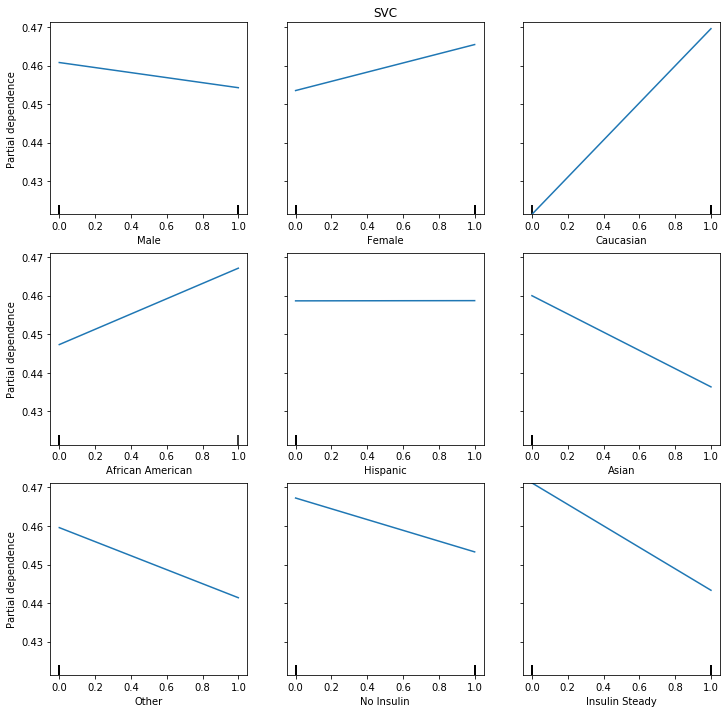

In [32]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title("SVC")
pdp_airbnb = PartialDependenceDisplay.from_estimator(model, test_X, [x for x in range(9)], ax = ax)

## Permutation Feature Importance

In [13]:
from sklearn.inspection import permutation_importance

In [14]:
model.score(test_X, test_y)

0.9192

In [34]:
r = permutation_importance(model, test_X, test_y, n_repeats = 5, random_state=42)

In [35]:
sorted_idx = r.importances_mean.argsort()[::-1][:10][::-1]

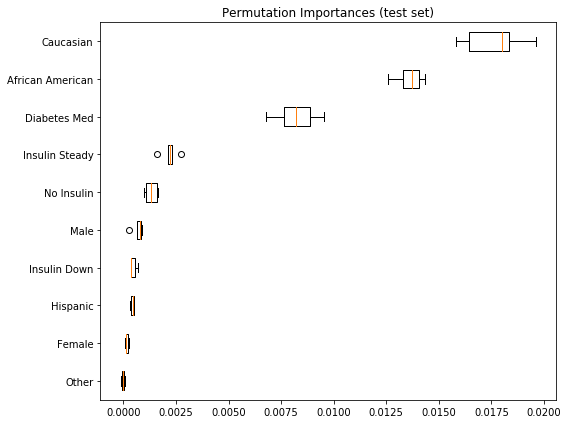

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(
    r.importances[sorted_idx].T, vert=False, labels=test_X.columns[sorted_idx]
)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

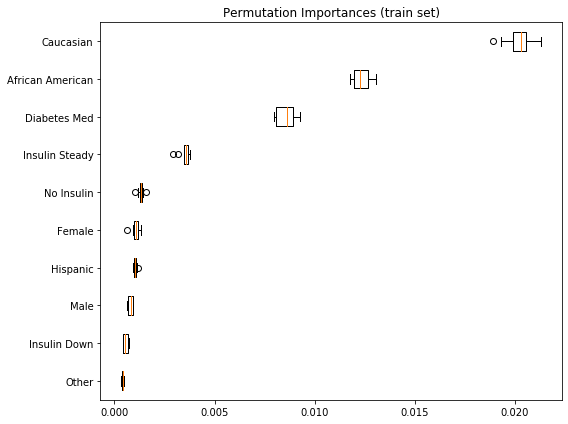

In [37]:
r = permutation_importance(model, train_X, train_y, n_repeats = 10, random_state=42)
sorted_idx = r.importances_mean.argsort()[::-1][:10][::-1]
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(
    r.importances[sorted_idx].T, vert=False, labels=train_X.columns[sorted_idx]
)
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

## Local Explanation

## SHAP

In [38]:

import shap
import numpy as np

In [39]:
explainer = shap.Explainer(model)
shap_test = explainer(test_X)
print(f"Shap values length: {len(shap_test)}\n")
print(f"Sample shap value:\n{shap_test[0]}")

Shap values length: 25442

Sample shap value:
.values =
array([ 0.00454131,  0.00552826,  0.02445897, -0.00874744, -0.00107149,
       -0.00024068, -0.00086483,  0.00406838, -0.02571965, -0.00294345,
       -0.00241663,  0.01590427])

.base_values =
array([0.46004035])

.data =
array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1])
